In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize']=16,10
plt.rcParams.update({'font.size': 12, 
                            'font.family': 'STIXGeneral', 
                            'mathtext.fontset': 'stix'})

In [2]:
data= pd.read_csv('hard_drive_data_2015.csv')

In [3]:
data.columns

Index(['Unnamed: 0', 'date', 'serial_number', 'model', 'capacity_bytes',
       'failure', 'smart_1_normalized', 'smart_1_raw', 'smart_5_normalized',
       'smart_5_raw', 'smart_9_normalized', 'smart_9_raw',
       'smart_194_normalized', 'smart_194_raw', 'smart_197_normalized',
       'smart_197_raw', 'smart_224_normalized', 'smart_224_raw'],
      dtype='object')

In [4]:
data.head(5)

Unnamed: 0        date   serial_number                    model  \
0           0  2015-01-01  MJ0351YNG9Z0XA  Hitachi HDS5C3030ALA630   
1           1  2015-01-01  MJ0351YNG9WJSA  Hitachi HDS5C3030ALA630   
2           2  2015-01-01  MJ0351YNG9Z7LA  Hitachi HDS5C3030ALA630   
3           3  2015-01-01  MJ0351YNGABYAA  Hitachi HDS5C3030ALA630   
4           4  2015-01-01  PL1321LAG34XWH  Hitachi HDS5C4040ALE630   

   capacity_bytes  failure  smart_1_normalized  smart_1_raw  \
0    3.000593e+12      0.0               100.0          0.0   
1    3.000593e+12      0.0               100.0          0.0   
2    3.000593e+12      0.0               100.0          0.0   
3    3.000593e+12      0.0               100.0          0.0   
4    4.000787e+12      0.0               100.0          0.0   

   smart_5_normalized  smart_5_raw  smart_9_normalized  smart_9_raw  \
0               100.0          0.0                98.0      19169.0   
1               100.0          2.0                98.0      19235.0   
2               100.0          0.0                98.0      18732.0   
3               100.0          0.0                98.0      17879.0   
4               100.0          0.0                98.0      15829.0   

   smart_194_normalized  smart_194_raw  smart_197_normalized  smart_197_raw  \
0                 253.0           22.0                 100.0            0.0   
1                 250.0           24.0                 100.0            0.0   
2                 250.0           24.0                 100.0            0.0   
3                 222.0           27.0                 100.0            0.0   
4                 206.0           29.0                 100.0            0.0   

   smart_224_normalized  smart_224_raw  
0                   NaN            NaN  
1                   NaN            NaN  
2                   NaN            NaN  
3                   NaN            NaN  
4                   NaN            NaN

In [7]:
data.shape

(17509251, 18)

In [66]:
######### 1. How many models are in the data set? ##########
models= data.model.nunique()
models

78

In [118]:
models1= data.model.unique()
len(models1)

78

In [67]:
####### 2. How many disks are in the data set? ######
# disks= serial_numbers
serial_n= data.serial_number.nunique()
serial_n

62898

In [69]:
#### 3. How many capacity bites are there in the data set? ##
capacity= data.capacity_bytes.nunique()
capacity

16

In [10]:
############# 4.  How many disks are per model? ##################
# One way to compute the number of disks per model is the following:
data.model.value_counts().sort_values(). head(3)
# THIS IS WRONG!!! because the disks that still work are counted again

WDC WD5000AAJS     7
WDC WD30EZRX      43
ST320005XXXX      67
Name: model, dtype: int64

In [287]:
### the disks are labeled by their serial number. Therefore,
### I have to count the number of UNIQUE serial numbers per model
# I create a new table with this information
c= pd.DataFrame(data.groupby(['model']).serial_number.nunique() )
c= c.reset_index()
c= c.sort_values(by='serial_number')
c.head()

model  serial_number
48             WDC WD15EARS              1
32              ST3500320AS              1
53           WDC WD2500AAJB              1
6   Hitachi HDS5C3030BLE630              1
55           WDC WD2500BEVT              1

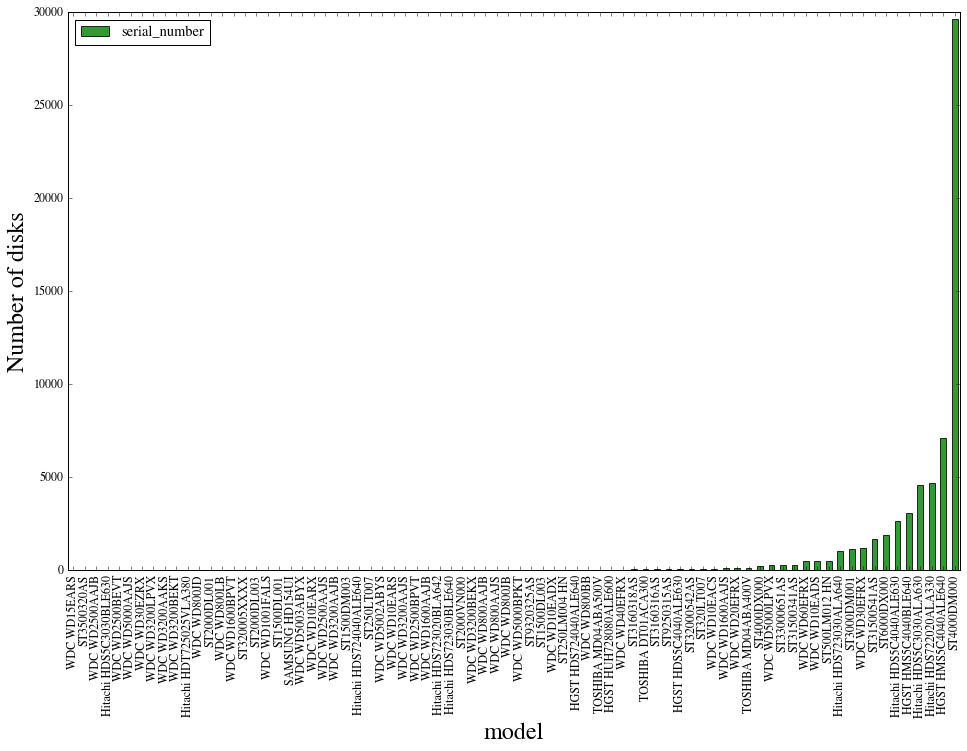

In [94]:
ax=c.plot(kind='bar', x= 'model', y='serial_number', color='green', alpha= 0.8)
ax.set_xlabel('model', fontsize= 24)
ax.set_ylabel('Number of disks', fontsize= 24)

In [55]:
#which model has the minimum number of disks?
minimum= c.serial_number.argmin() 
c.loc[minimum]

model            WDC WD15EARS
serial_number               1
Name: 48, dtype: object

In [65]:
#which model has the maximum number of disks?
maximum= c.serial_number.argmax()
c.loc[maximum]

model            ST4000DM000
serial_number          29670
Name: 33, dtype: object

In [121]:
##### 5. How many disks are there per capacity bytes? ##########
capacity= pd.DataFrame(data.groupby(['capacity_bytes']).serial_number.nunique() )
capacity= capacity.reset_index()
capacity= capacity[capacity.capacity_bytes >0]
capacity.capacity_bytes /= 1e12

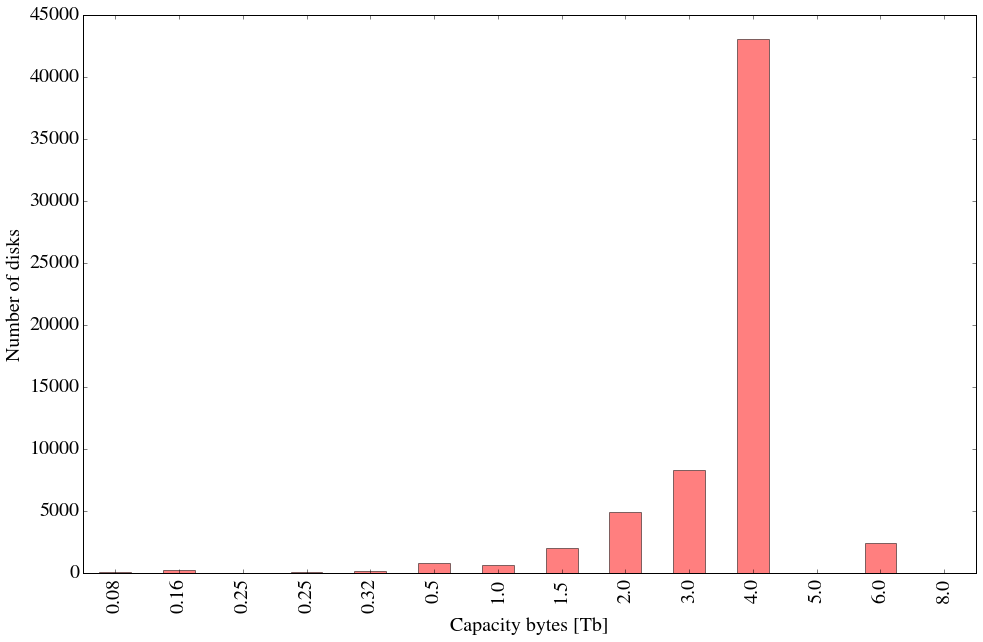

In [122]:
capacity.capacity_bytes= capacity.capacity_bytes.round(2)
ax= capacity.plot(kind='bar', x='capacity_bytes' , y='serial_number', 
              fontsize= 20, color= 'red', alpha= 0.5, legend=False)
ax.set_xlabel('Capacity bytes [Tb]', fontsize=30)
ax.set_ylabel('Number of disks', fontsize=30)

In [ ]:
############### 6. How many capacity bytes are there per model? #####
capacity_b= pd.DataFrame(data.groupby(['model', 'capacity_bytes']).serial_number.nunique() )
capacity_b= capacity_b.reset_index()
capacity_b.head()

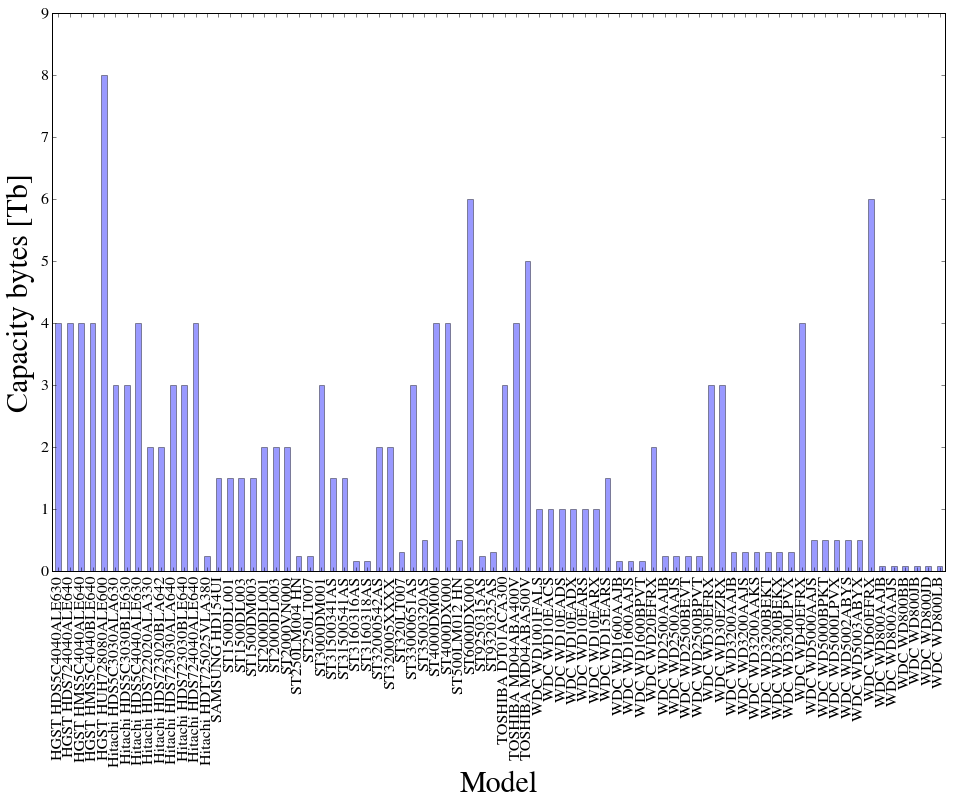

In [357]:
# In the analysis I remove negative capacities
capacity_b= capacity_b[capacity_b.capacity_bytes> 0]
capacity_b.capacity_bytes /= 1e12
ax= capacity_b.plot(x='model', y='capacity_bytes', kind= 'bar', 
           legend= False, fontsize=16, alpha= 0.4)
ax.set_ylabel('Capacity bytes [Tb]', fontsize=30)
ax.set_xlabel('Model', fontsize=30)

In [358]:
# tables with HGST, Hitachi and Toshiba models
#frame= pd.DataFrame()
#list_=[]
#models= ['HGST', 'TOSHIBA', 'Hitachi', 'ST', 'WDC', 'SAMSUNG']
#for model in models:
#    df= pd.DataFrame(capacity_b[capacity_b.model.str.startswith(model)])
#    df.model= model
#    df= pd.DataFrame(df.groupby(['capacity_bytes', 'model']).serial_number.sum())
#    df= df.reset_index()
#    list_.append(df)
#frame= pd.concat(list_, ignore_index=True)
#frame.capacity_bytes /= 1e12
#frame.capacity_bytes= frame.capacity_bytes.round(2)
#frame.head()

In [360]:
#ax= frame.plot(x='model', y='capacity_bytes', kind= 'barh', 
#           legend= False, fontsize=20, alpha= 0.4)
#ax.set_xlabel('Capacity bytes [Tb]', fontsize=30)
#ax.set_ylabel('Model', fontsize=30)

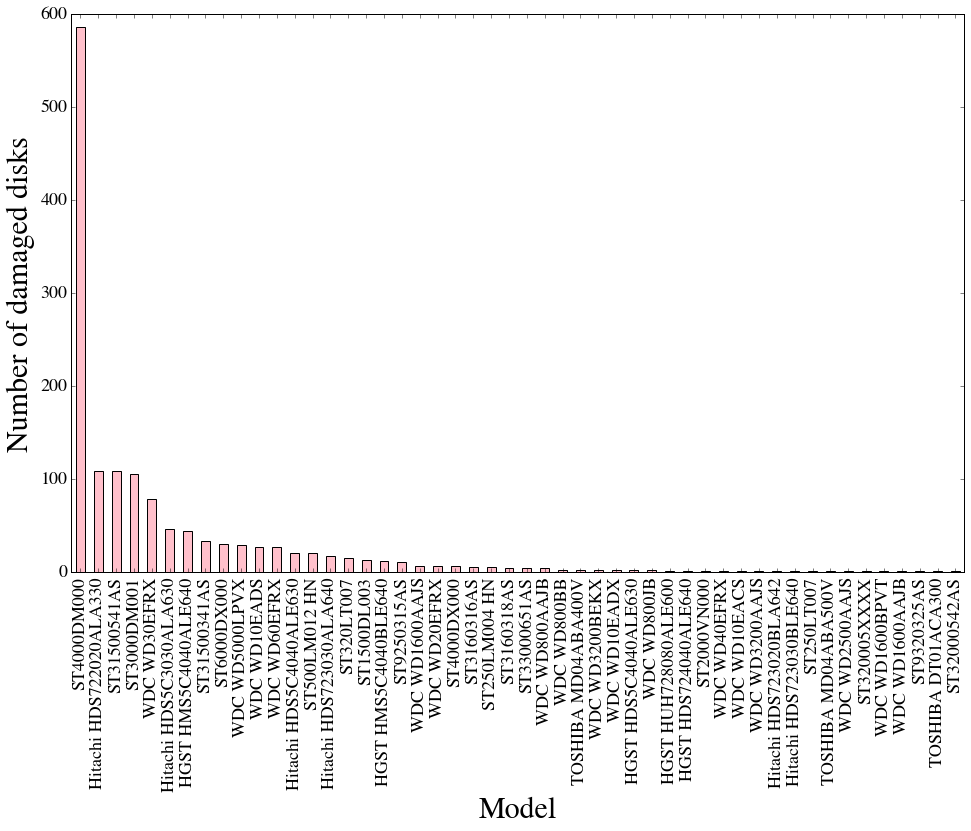

In [314]:
################## 7. Find failures for models  ##########################
# Once a disk fails it is not added in the data anymore. Therefore, here
# it is not necesary to use unique
damaged= data[data.failure==1]
damaged= pd.DataFrame( damaged.groupby('model').size() )
damaged= damaged.reset_index()
damaged.columns= ['model','damaged_disks']
damaged= damaged.sort_values(by='damaged_disks', ascending=False)
ax= damaged.plot(kind= 'bar', x= 'model', y='damaged_disks', 
             legend= False, fontsize=18, color='pink')
ax.set_xlabel('Model', fontsize=30)
ax.set_ylabel('Number of damaged disks', fontsize=30)
## THIS PLOT DOES NOT HAVE MUCH SENSE. The biggest number of damaged disks
## corresponds to the model with more units.
## It is better to plot failure rate per model.

In [439]:
############ 8. Find failure rate as a function of model #################
T1= pd.DataFrame(data.groupby(['model']).serial_number.nunique()).reset_index()
T2= pd.DataFrame(data.groupby(['model']).failure.sum()).reset_index()

In [430]:
T_merged= T1.merge(T2)
T_merged['working_disks']= T_merged.serial_number- T_merged.failure
T_merged['failure_rate']= T_merged.failure/ T_merged.serial_number
T_merged.columns= ['model', 'total_disks', 'failure_disks', 'working_disks', 'failure_rate']
T_merged['success_rate']= T_merged.working_disks/ T_merged.total_disks
T_merged

model  capacity_bytes  total_disks  failure_disks  \
0      HGST HDS5C4040ALE630    4.000787e+12           63            3.0   
1      HGST HDS724040ALE640    4.000787e+12           42            2.0   
3      HGST HMS5C4040ALE640    4.000787e+12         7129           43.0   
4      HGST HMS5C4040BLE640    4.000787e+12         3103           12.0   
5      HGST HUH728080ALE600    8.001563e+12           47            2.0   
6   Hitachi HDS5C3030ALA630    3.000593e+12         4606           47.0   
7   Hitachi HDS5C3030BLE630    3.000593e+12            1            0.0   
8   Hitachi HDS5C4040ALE630    4.000787e+12         2660           21.0   
9   Hitachi HDS722020ALA330    2.000399e+12         4683          109.0   
10  Hitachi HDS723020BLA642    2.000399e+12            9            1.0   
11  Hitachi HDS723030ALA640    3.000593e+12         1018           18.0   
12  Hitachi HDS723030BLE640    3.000593e+12           10            1.0   
13  Hitachi HDS724040ALE640    4.000787e+12            3            0.0   
14  Hitachi HDT725025VLA380    2.500000e+11            1            0.0   
15          SAMSUNG HD154UI    1.500302e+12            2            0.0   
16              ST1500DL001    1.500302e+12            2            0.0   
17              ST1500DL003    1.500302e+12           24           13.0   
18              ST1500DM003    1.500302e+12            3            0.0   
19              ST2000DL001    2.000399e+12            1            0.0   
20              ST2000DL003    2.000399e+12            2            0.0   
21              ST2000VN000    2.000399e+12           10            2.0   
22            ST250LM004 HN    2.500594e+11           38            6.0   
23               ST250LT007    2.500594e+11            4            1.0   
24              ST3000DM001    3.000593e+12         1168          106.0   
25             ST31500341AS    1.500302e+12          307           34.0   
26             ST31500541AS    1.500302e+12         1693          109.0   
27              ST3160316AS    1.600419e+11           57            6.0   
28              ST3160318AS    1.600419e+11           50            5.0   
29             ST32000542AS    2.000399e+12           83            1.0   
30             ST320005XXXX    2.000399e+12            2            1.0   
..                      ...             ...          ...            ...   
50             WDC WD15EARS    1.500302e+12            1            0.0   
51           WDC WD1600AAJB    1.600419e+11            8            1.0   
52           WDC WD1600AAJS    1.600419e+11          106            7.0   
53           WDC WD1600BPVT    1.600419e+11            2            1.0   
54             WDC WD20EFRX    2.000399e+12          141            7.0   
55           WDC WD2500AAJB    2.500594e+11            1            0.0   
56           WDC WD2500AAJS    2.500594e+11            3            1.0   
57           WDC WD2500BEVT    2.500594e+11            1            0.0   
58           WDC WD2500BPVT    2.500594e+11            8            0.0   
59             WDC WD30EFRX    3.000593e+12         1209           79.0   
60             WDC WD30EZRX    3.000593e+12            1            0.0   
61           WDC WD3200AAJB    3.200729e+11            3            0.0   
62           WDC WD3200AAJS    3.200729e+11            5            1.0   
63           WDC WD3200AAKS    3.200729e+11            1            0.0   
64           WDC WD3200BEKT    3.200729e+11            1            0.0   
65           WDC WD3200BEKX    3.200729e+11           14            3.0   
66           WDC WD3200LPVX    3.200729e+11            1            0.0   
67             WDC WD40EFRX    4.000787e+12           48            2.0   
68           WDC WD5000AAJS    5.001079e+11            1            0.0   
69           WDC WD5000BPKT    5.001079e+11           24            0.0   
70           WDC WD5000LPVX    5.001079e+11          271           30.0   
71           WDC WD5002ABYS    5.001079e+11    

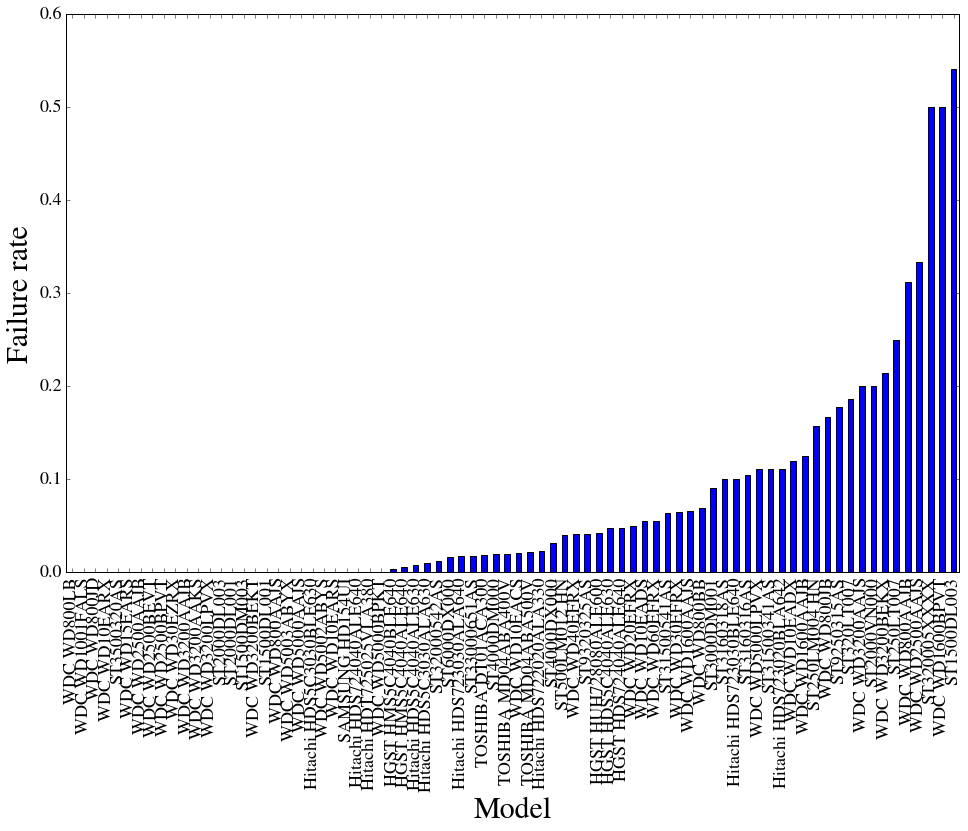

In [402]:
T_merged1= T_merged.sort_values(by='failure_rate', ascending=True)
ax= T_merged1.plot(kind='bar', x='model', y='failure_rate',
               fontsize= 18, legend=False)
ax.set_xlabel('Model', fontsize=30)
ax.set_ylabel('Failure rate', fontsize=30)

In [438]:
columns=['model', 'success_rate','failure_rate']
T_merged2= T_merged[columns]
ax= T_merged2.plot.bar(stacked=True, fontsize=14)
ax.set_xlabel('Model_index', fontsize=30)
ax.set_ylabel('', fontsize=30)

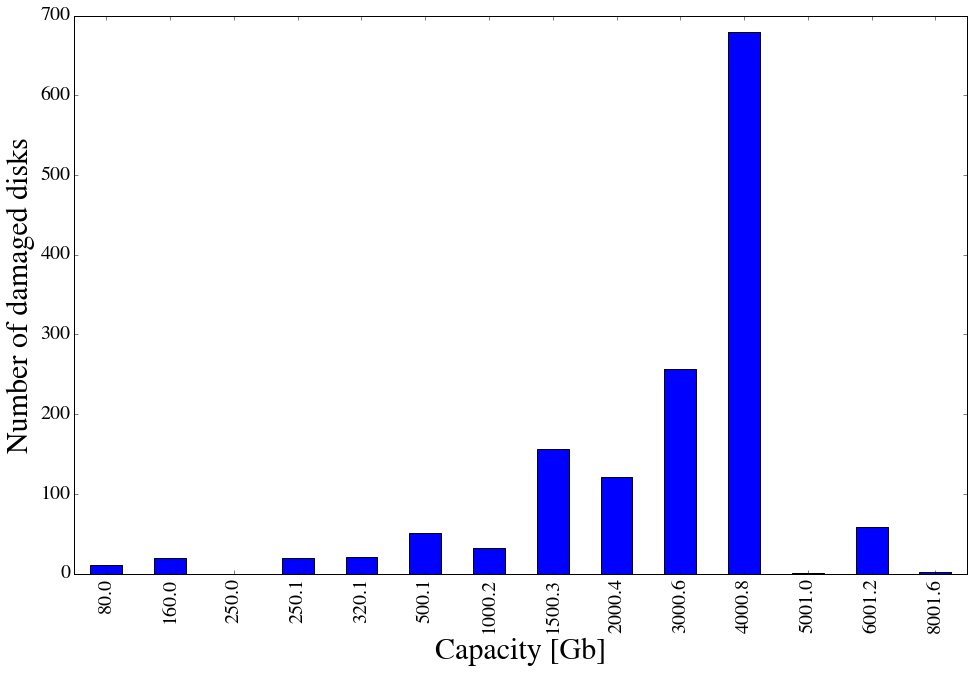

In [7]:
############ 8. find the failure disks as a function of capacity   ########################
 
df_capacity= pd.DataFrame(data.groupby(['capacity_bytes']).failure.sum()).reset_index()
df_capacity= df_capacity[df_capacity.capacity_bytes>0]
df_capacity.capacity_bytes /=1e9
df_capacity.capacity_bytes= df_capacity.capacity_bytes.round(1)
ax= df_capacity.plot(kind='bar', x= 'capacity_bytes', y='failure', 
                 fontsize= 20, legend=False)
ax.set_xlabel('Capacity [Gb]', fontsize=30)
ax.set_ylabel('Number of damaged disks', fontsize=30)
#Conclussion: no apparent relation between capacity and damaged disks
# similar to No. disks Vs. capacity
# This has no sense, because the number of damaged disks corresponds
# to the capacity of the model with more disks. 
# Better to plot the failure rate

In [22]:
df= data.groupby(['capacity_bytes'])
table= pd.DataFrame(df.agg({'serial_number': lambda x: np.size(np.unique(x)),
                            'failure': np.sum }) ).reset_index()
table= table[table.capacity_bytes >0]
table.columns= ['capacity_bytes', 'total_disks', 'damaged_disks']

In [23]:
table['working_disks']= table.total_disks- table.damaged_disks
table['failure_rate']= table.damaged_disks/ table.total_disks 

In [24]:
table['success_rate']= table.working_disks/ table.total_disks 
table.capacity_bytes /= 1e9
table.capacity_bytes= table.capacity_bytes.round(2) 
table.head()

capacity_bytes  total_disks  damaged_disks  working_disks  failure_rate  \
2           80.03           96           11.0           85.0      0.114583   
3          160.04          223           20.0          203.0      0.089686   
4          250.00            1            0.0            1.0      0.000000   
5          250.06          117           19.0           98.0      0.162393   
6          320.07          135           21.0          114.0      0.155556   

   success_rate  
2      0.885417  
3      0.910314  
4      1.000000  
5      0.837607  
6      0.844444

In [51]:
#width=0.1
#fig= plt.figure()
#ax= fig.add_subplot(111)
#ax.bar(np.array(table.capacity_bytes/1e3).round(3),np.array(table.failure_rate), width )
#ax.bar(np.array(table.capacity_bytes/1e3).round(3)+width, np.array(table.success_rate), width, color='y' )

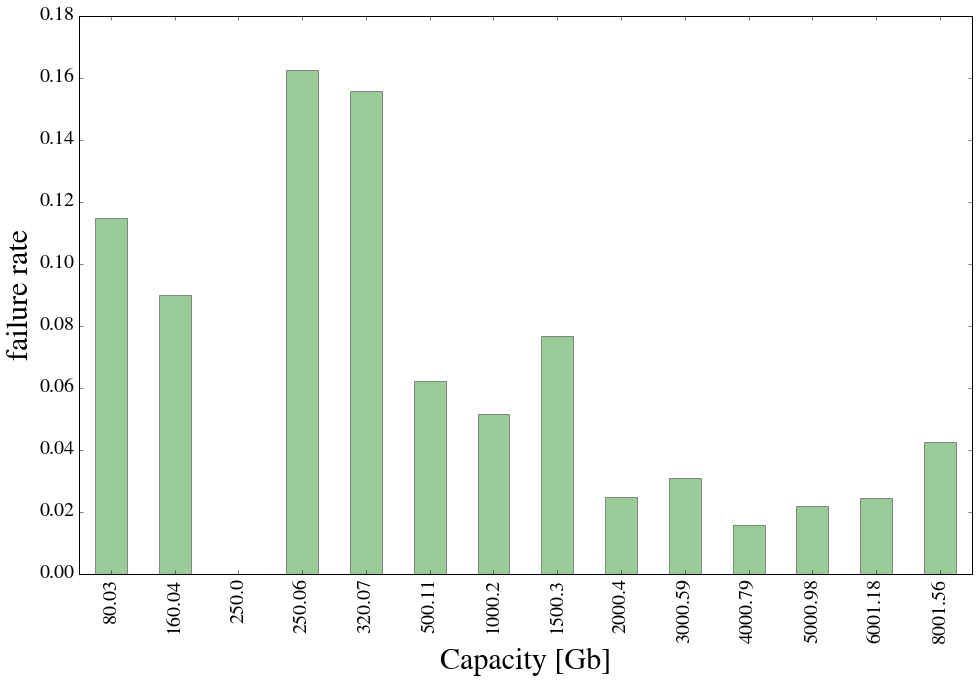

In [56]:
ax= table.plot(kind='bar', x= 'capacity_bytes', y= 'failure_rate',
          fontsize= 20, legend=False, color= 'green', alpha=0.4)
ax.set_xlabel('Capacity [Gb]', fontsize= 30)
ax.set_ylabel('failure rate', fontsize= 30)
#ax.set_ylim(0,1)

In [ ]:
####### Notes:
###### So far:  there is a dependence between failure rate and model: 
######          we know which models fail more often
######          there is a dependence between failure rate and capacity:
######          disks of 250 and 320 Gb have bigger failure rate, 
######          however this rate is smaller than 0.2%
